In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('healthcare_dataset.csv')

In [3]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Data Preprocessing

In [4]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
duplicates_all = df[df.duplicated()]
print(duplicates_all)

                     Name  Age  Gender Blood Type Medical Condition  \
50023        Samuel joYCe   56    Male         O+         Arthritis   
50040    KIMBErly vasqueZ   26    Male         A-           Obesity   
50055      SCoTT tHOrNton   55  Female         B-           Obesity   
50070         wiLliam LEe   27  Female         O+         Arthritis   
50078  chRistOPheR NoRrIs   38    Male        AB-         Arthritis   
...                   ...  ...     ...        ...               ...   
55461      connOR coMPTon   63    Male         A+            Asthma   
55462       alYSsA mIlLER   35  Female         A-          Diabetes   
55464        ChRIs huGHeS   35  Female        AB-           Obesity   
55484     keNNEtH alvarez   80    Male         O+            Cancer   
55491       lInDA grIFfin   47  Female         O+           Obesity   

      Date of Admission             Doctor                    Hospital  \
50023        2022-11-03     Krista Hartman              Thomas-Ballard   

In [7]:
# drop duplicate data
df.drop_duplicates(inplace=True)
df.shape

(54966, 15)

In [8]:
# removes  Nan value .
df.dropna(inplace =True)

In [9]:
#  Nan Value in the dataframe
df.isnull().any().any()

False

In [10]:
#Count the nan value
df.isnull().sum().sum()

0

In [11]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

Missing values:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [12]:
df['Name'].unique()

array(['Bobby JacksOn', 'LesLie TErRy', 'DaNnY sMitH', ...,
       'LiSa sIMPsoN', 'RoGER farRELl', 'kaTheRIne WeBSTer'], dtype=object)

In [13]:
df['Age'].unique()

array([30, 62, 76, 28, 43, 36, 21, 20, 82, 58, 72, 38, 75, 68, 44, 46, 63,
       34, 67, 48, 59, 73, 51, 23, 78, 25, 33, 26, 70, 57, 74, 81, 49, 65,
       31, 22, 77, 42, 24, 84, 55, 40, 83, 18, 27, 19, 29, 61, 80, 60, 35,
       79, 53, 69, 47, 85, 52, 37, 50, 32, 54, 45, 66, 39, 56, 64, 71, 41,
       88, 17, 87, 86, 15, 16, 13, 14, 89], dtype=int64)

In [14]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [16]:
df['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [17]:
df['Date of Admission'].unique()

array(['2024-01-31', '2019-08-20', '2022-09-22', ..., '2019-05-31',
       '2023-10-12', '2021-03-14'], dtype=object)

In [18]:
df['Doctor'].unique()

array(['Matthew Smith', 'Samantha Davies', 'Tiffany Mitchell', ...,
       'Deborah Sutton', 'Mary Bartlett', 'Alec May'], dtype=object)

In [19]:
df['Hospital'].unique()

array(['Sons and Miller', 'Kim Inc', 'Cook PLC', ...,
       'Guzman Jones and Graves,', 'and Williams, Brown Mckenzie',
       'Moreno Murphy, Griffith and'], dtype=object)

In [20]:
df['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

In [21]:
df['Billing Amount'].unique()

array([18856.28130598, 33643.32728658, 27955.09607884, ...,
        8441.14706442, 34934.2841126 ,  8926.28593733])

In [22]:
df['Room Number'].unique()

array([328, 265, 205, 450, 458, 389, 277, 316, 249, 394, 288, 134, 309,
       182, 465, 114, 449, 260, 115, 295, 327, 119, 109, 162, 401, 157,
       223, 293, 371, 108, 245, 494, 285, 228, 481, 212, 113, 272, 478,
       196, 418, 410, 300, 211, 413, 138, 456, 234, 492, 180, 250, 296,
       330, 405, 306, 333, 244, 325, 378, 468, 368, 263, 489, 241, 231,
       377, 407, 135, 131, 102, 255, 422, 320, 273, 395, 152, 321, 428,
       482, 268, 120, 318, 144, 226, 459, 208, 227, 402, 442, 425, 373,
       290, 361, 251, 440, 414, 424, 307, 476, 388, 326, 178, 177, 302,
       130, 430, 133, 104, 408, 376, 331, 275, 480, 233, 384, 380, 310,
       406, 213, 427, 500, 451, 485, 267, 154, 466, 453, 261, 167, 179,
       490, 258, 483, 202, 198, 308, 278, 103, 400, 192, 128, 238, 136,
       218, 348, 486, 147, 126, 314, 271, 341, 498, 168, 189, 438, 286,
       266, 392, 156, 315, 322, 184, 472, 398, 435, 174, 137, 111, 464,
       117, 493, 183, 471, 164, 356, 497, 421, 488, 317, 247, 15

In [23]:
df['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [24]:
df['Discharge Date'].unique()

array(['2024-02-02', '2019-08-26', '2022-10-07', ..., '2019-05-09',
       '2024-05-31', '2024-06-06'], dtype=object)

In [25]:
df['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [26]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_32244\2581808566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Test Results', palette='Set2')


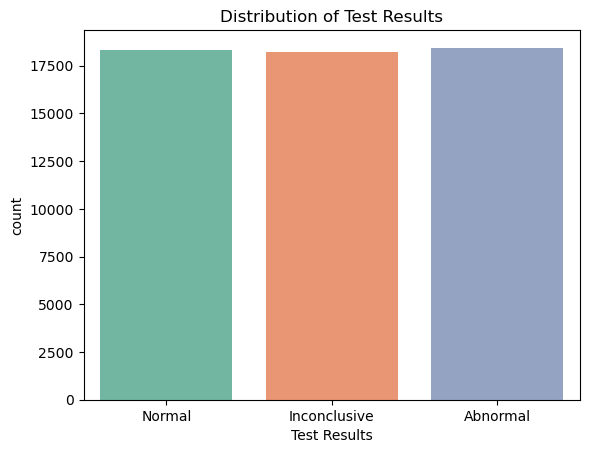

In [27]:
# Value counts
print(df['Test Results'].value_counts())

# Bar plot
sns.countplot(data=df, x='Test Results', palette='Set2')
plt.title("Distribution of Test Results")
plt.show()


# Lable Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encode target label
le = LabelEncoder()
df['Test Results Encoded'] = le.fit_transform(df['Test Results'])
print(le.classes_)


['Abnormal' 'Inconclusive' 'Normal']


# Outlier detection

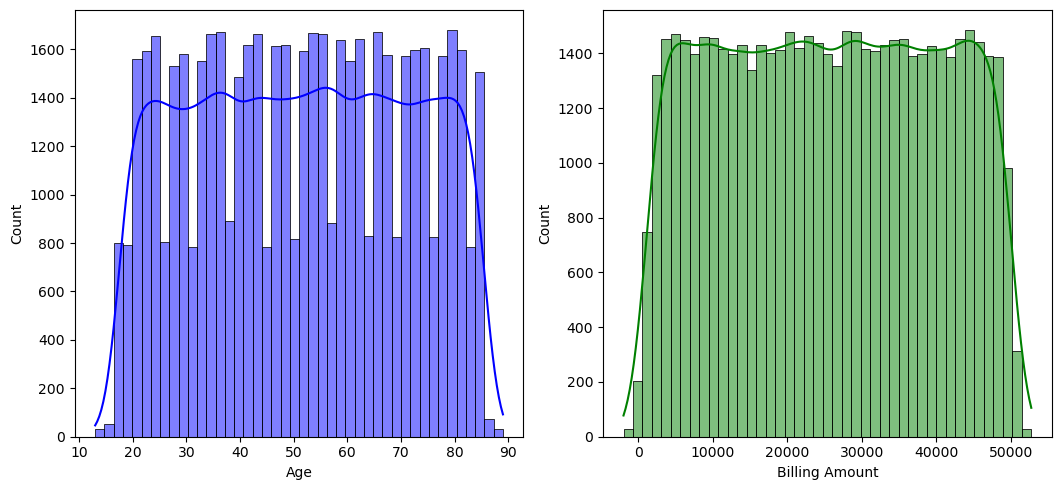

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))

# First subplot
plt.subplot(1, 3, 1)  
sns.histplot(df['Age'], kde=True, color='blue')  

# Second subplot
plt.subplot(1, 3, 2)  
sns.histplot(df['Billing Amount'], kde=True, color='green')  


# Show the plots
plt.tight_layout()  
plt.show()


<Axes: ylabel='Age'>

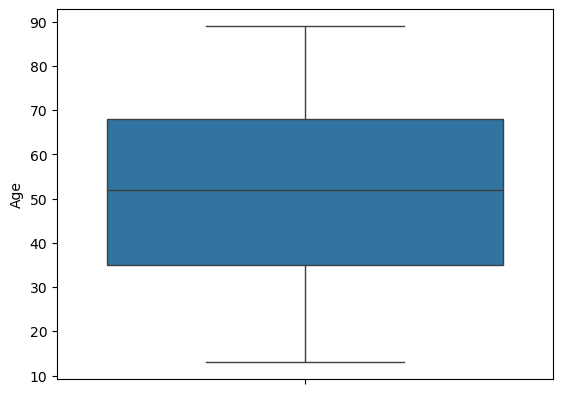

In [30]:
df['Age'].skew()
df['Age'].describe()
sns.boxplot(df['Age'])

<Axes: ylabel='Billing Amount'>

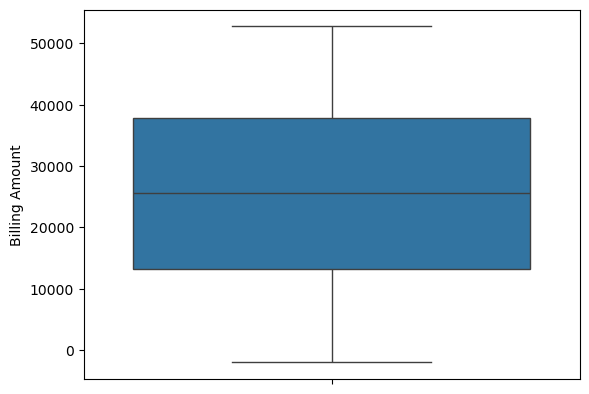

In [31]:
df['Billing Amount'].skew()
df['Billing Amount'].describe()
sns.boxplot(df['Billing Amount'])

# Feature Scaling 

# Standard Scaling

In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# List of numeric columns to scale
# Select numeric features
# Include more features (including categorical)
X = df[['Age', 'Billing Amount', 'Gender', 'Blood Type']]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Target column
y = df['Test Results']

In [78]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Important: set original index to avoid NaNs during concat
#minmax_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Convert to DataFrame (optional)
X1_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
# Now concatenate with y
final_stand_df = pd.concat([X1_scaled_df, y], axis=1)



# View sample
print(final_stand_df .head())
#print("Encoded classes:", label_encoder.classes_)

        Age  Billing Amount  Gender_Female  Gender_Male  Blood Type_A+  \
0 -1.098427       -0.470713      -0.999527     0.999527      -0.378758   
1  0.533770        0.570021      -0.999527     0.999527       2.640210   
2  1.247856        0.169675       1.000473    -1.000473      -0.378758   
3 -1.200439        0.870301       1.000473    -1.000473      -0.378758   
4 -0.435347       -0.795732       1.000473    -1.000473      -0.378758   

   Blood Type_A-  Blood Type_AB+  Blood Type_AB-  Blood Type_B+  \
0      -0.378821       -0.378318       -0.378067      -0.378412   
1      -0.378821       -0.378318       -0.378067      -0.378412   
2       2.639772       -0.378318       -0.378067      -0.378412   
3      -0.378821       -0.378318       -0.378067      -0.378412   
4      -0.378821        2.643279       -0.378067      -0.378412   

   Blood Type_B-  Blood Type_O+  Blood Type_O-  Test Results  
0       2.645476      -0.377469      -0.375863        Normal  
1      -0.378004      -0.3

In [79]:
print(final_stand_df.isna().sum()) 

Age               0
Billing Amount    0
Gender_Female     0
Gender_Male       0
Blood Type_A+     0
Blood Type_A-     0
Blood Type_AB+    0
Blood Type_AB-    0
Blood Type_B+     0
Blood Type_B-     0
Blood Type_O+     0
Blood Type_O-     0
Test Results      0
dtype: int64


# Minmax scaling 

In [34]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Convert to DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# View sample
print(X_scaled_df.head())

        Age  Billing Amount  Gender_Female  Gender_Male  Blood Type_A+  \
0  0.223684        0.380933            0.0          1.0            0.0   
1  0.644737        0.650904            0.0          1.0            1.0   
2  0.828947        0.547053            1.0          0.0            0.0   
3  0.197368        0.728798            1.0          0.0            0.0   
4  0.394737        0.296622            1.0          0.0            0.0   

   Blood Type_A-  Blood Type_AB+  Blood Type_AB-  Blood Type_B+  \
0            0.0             0.0             0.0            0.0   
1            0.0             0.0             0.0            0.0   
2            1.0             0.0             0.0            0.0   
3            0.0             0.0             0.0            0.0   
4            0.0             1.0             0.0            0.0   

   Blood Type_B-  Blood Type_O+  Blood Type_O-  
0            1.0            0.0            0.0  
1            0.0            0.0            0.0  
2    

# PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df['Test Results'])

In [37]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [38]:
X_pca = pca.fit_transform(X_scaled)

In [39]:
X_scaled.shape

(54966, 12)

In [40]:
X_pca.shape

(54966, 2)

In [41]:
X_pca

array([[ 0.70741014, -0.03537823],
       [ 0.70086605, -0.53556179],
       [-0.70563721,  0.83310776],
       ...,
       [-0.70076999, -0.12589361],
       [ 0.70193505, -0.00726996],
       [-0.70880614, -0.01815639]])

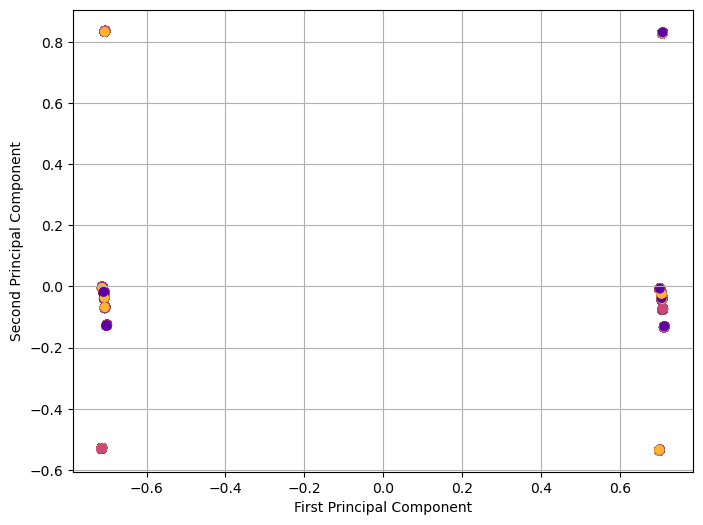

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.clim(-0.5, len(le.classes_)-0.5)
plt.grid(True)
plt.show()

# Data Visulization

# Violin Plot

C:\Users\Admin\AppData\Local\Temp\ipykernel_32244\522851624.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Test Results', y='Age', data=df, palette='Set2')


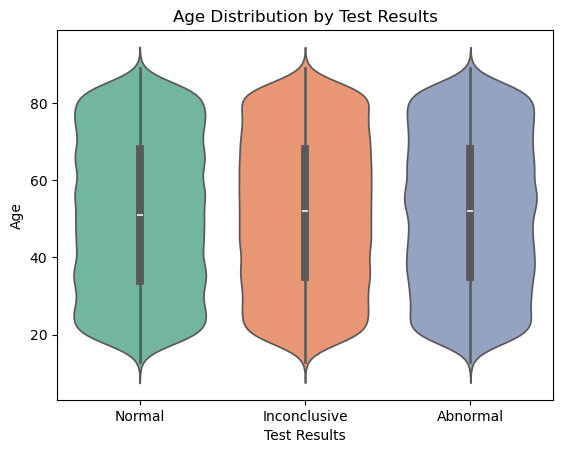

In [43]:
sns.violinplot(x='Test Results', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Test Results')
plt.xlabel('Test Results')
plt.ylabel('Age')
plt.show()


# BAR PLOT

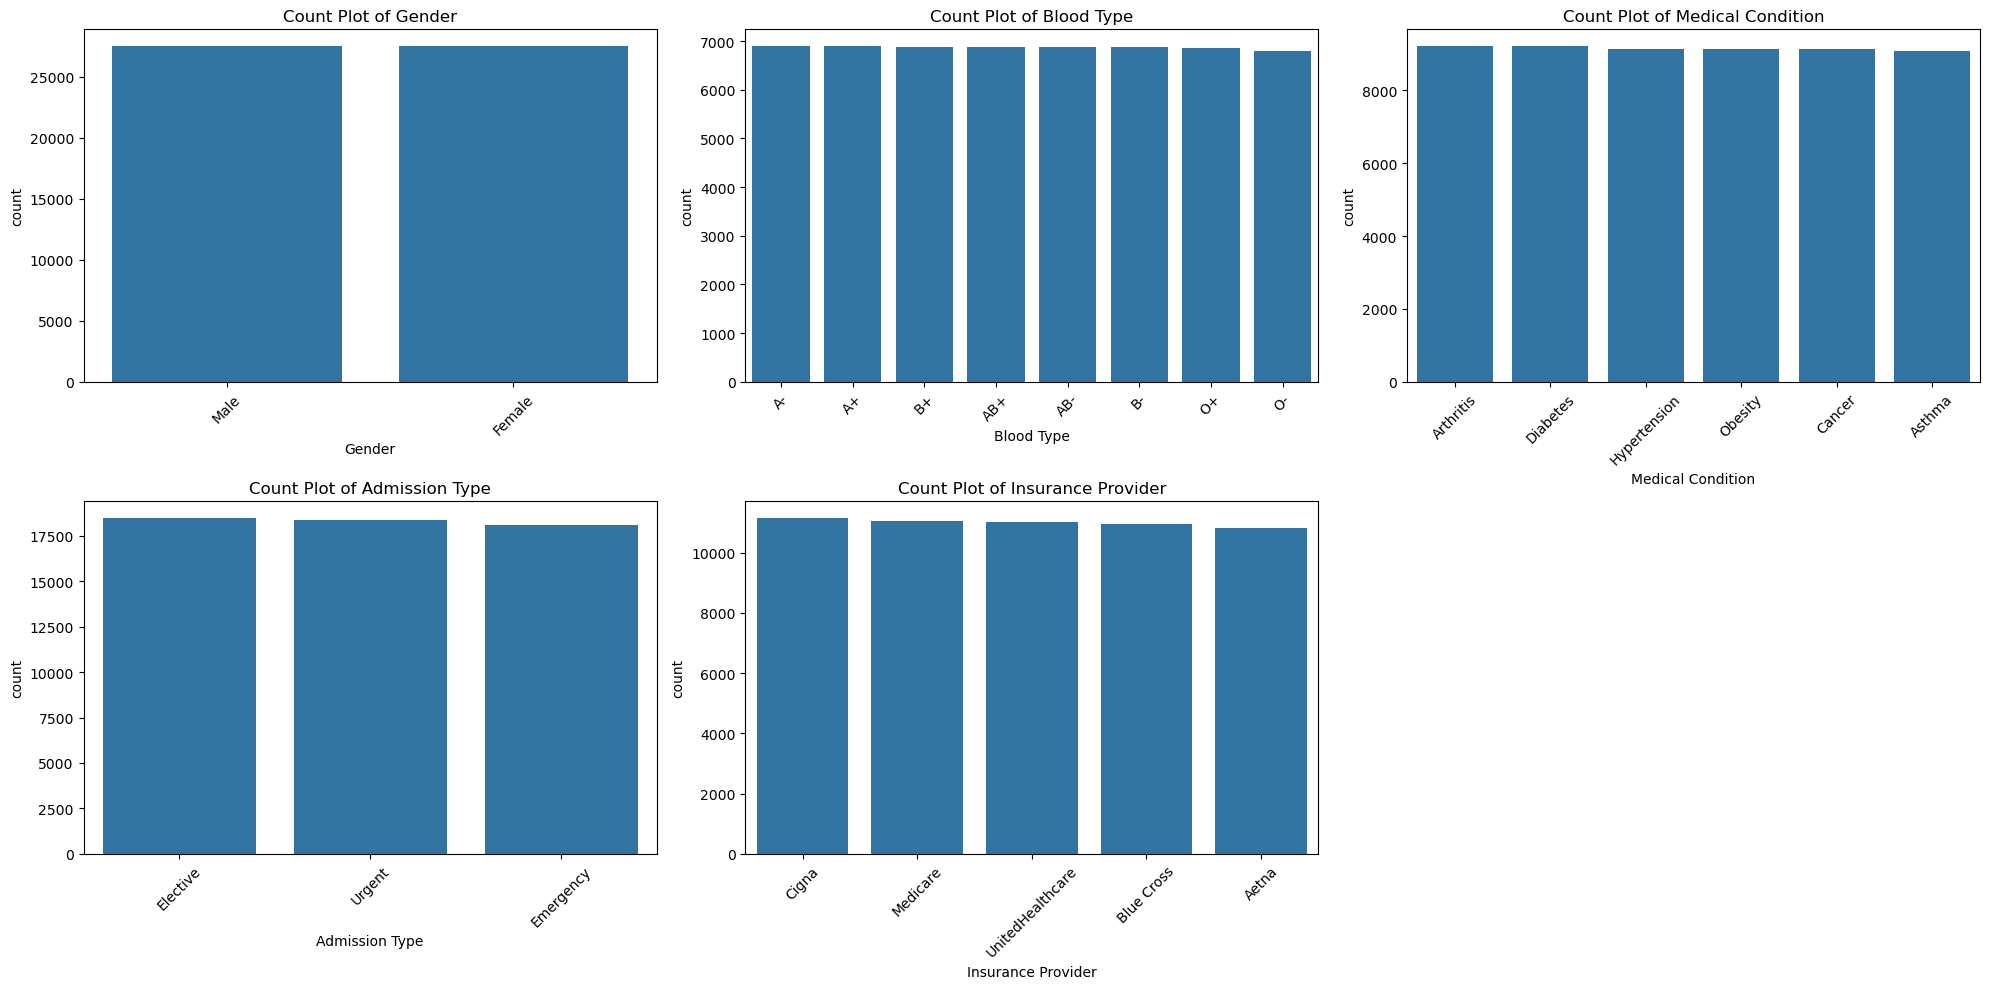

In [44]:
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider']

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()


# Violinplot

C:\Users\Admin\AppData\Local\Temp\ipykernel_32244\3192782101.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Insurance Provider', y='Billing Amount', data=df, palette='Pastel1')


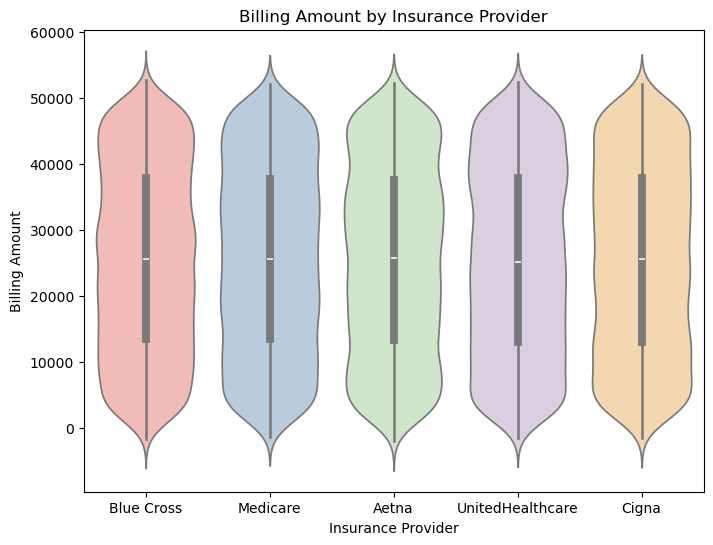

In [45]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Insurance Provider', y='Billing Amount', data=df, palette='Pastel1')
plt.title('Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.show()


# Time series plot

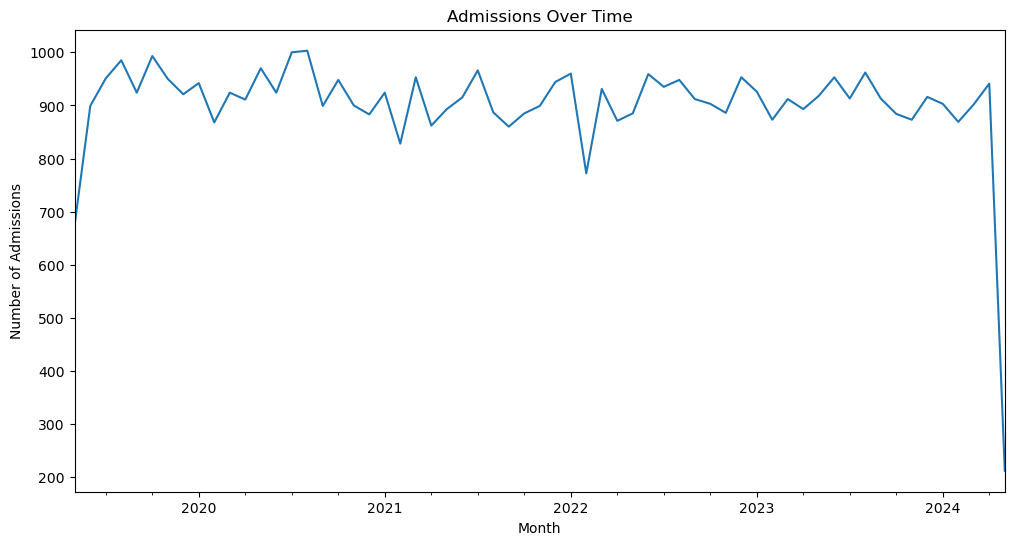

In [46]:
# Convert to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Count admissions per month/year
admissions_per_month = df.groupby(df['Date of Admission'].dt.to_period('M')).size()

admissions_per_month.plot(kind='line', figsize=(12, 6), title='Admissions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.show()


# Strip Plot

C:\Users\Admin\AppData\Local\Temp\ipykernel_32244\1508989591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


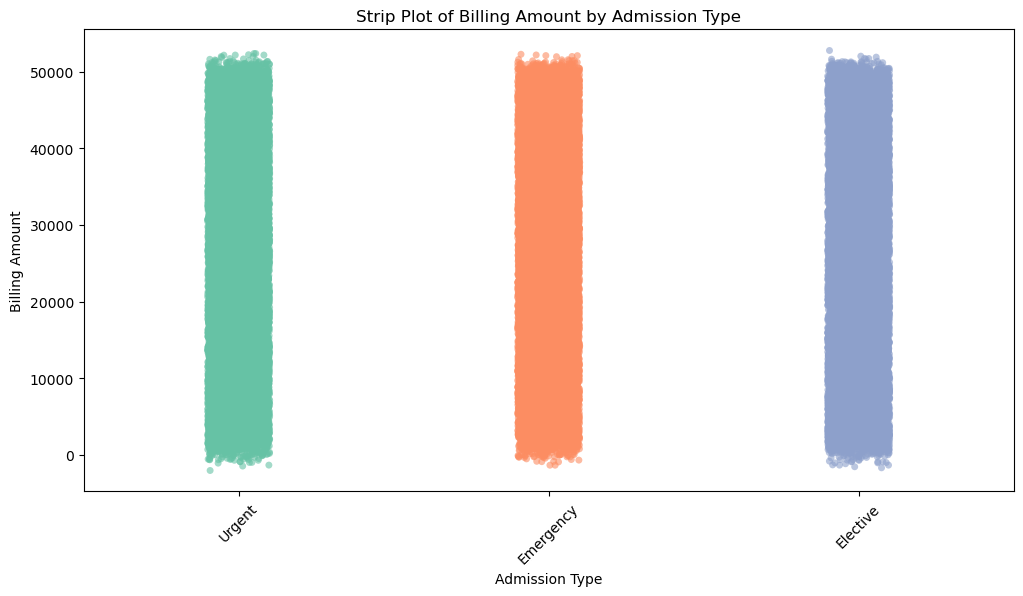

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df, 
    x='Admission Type', 
    y='Billing Amount', 
    jitter=True, 
    alpha=0.6,
    palette='Set2'  # Change this to any seaborn palette or list of colors
)
plt.title('Strip Plot of Billing Amount by Admission Type')
plt.xticks(rotation=45)
plt.show()


# Implementation & Evaluation

# Task 1

# MLP Claasifier

In [65]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
X = final_stand_df.drop('Test Results', axis=1)
y = final_stand_df['Test Results']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Step 7: Define MLP model (deeper + regularization)
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    alpha=0.0005,
)

# Step 8: Train model
mlp.fit(X_train, y_train)

# Step 9: Predict
y_pred = mlp.predict(X_test)

# Step 10: Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.3303

 Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.61      0.43      3616
           1       0.33      0.34      0.33      3682
           2       0.32      0.04      0.07      3696

    accuracy                           0.33     10994
   macro avg       0.33      0.33      0.28     10994
weighted avg       0.33      0.33      0.28     10994

